In [1]:
import sys
sys.path.append('..')
from dnn import DNN
from dbn import DBN
from load_data import *

import numpy as np
import matplotlib.pyplot as plt

# Load data

In [2]:
binary_alpha = lire_alpha_digits(['A', 'E', 'X', '4'])

In [3]:
X_train, y_train, X_test, y_test = load_mnist()

# Hyperparameters

In [4]:
epochs = 5000
batch_size = 64
learning_rate = 1e-3
patience = 10

nb_layers = 3
neurons = [512, 256, 128]

# Alpha Digits

In [5]:
dbn_alpha = DBN(X=binary_alpha, L=nb_layers, qs=neurons)

In [6]:
dbn_alpha.train_DBN(epochs=epochs, learning_rate=learning_rate, batch_size=batch_size)

  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [03:47<00:00, 75.91s/it] 


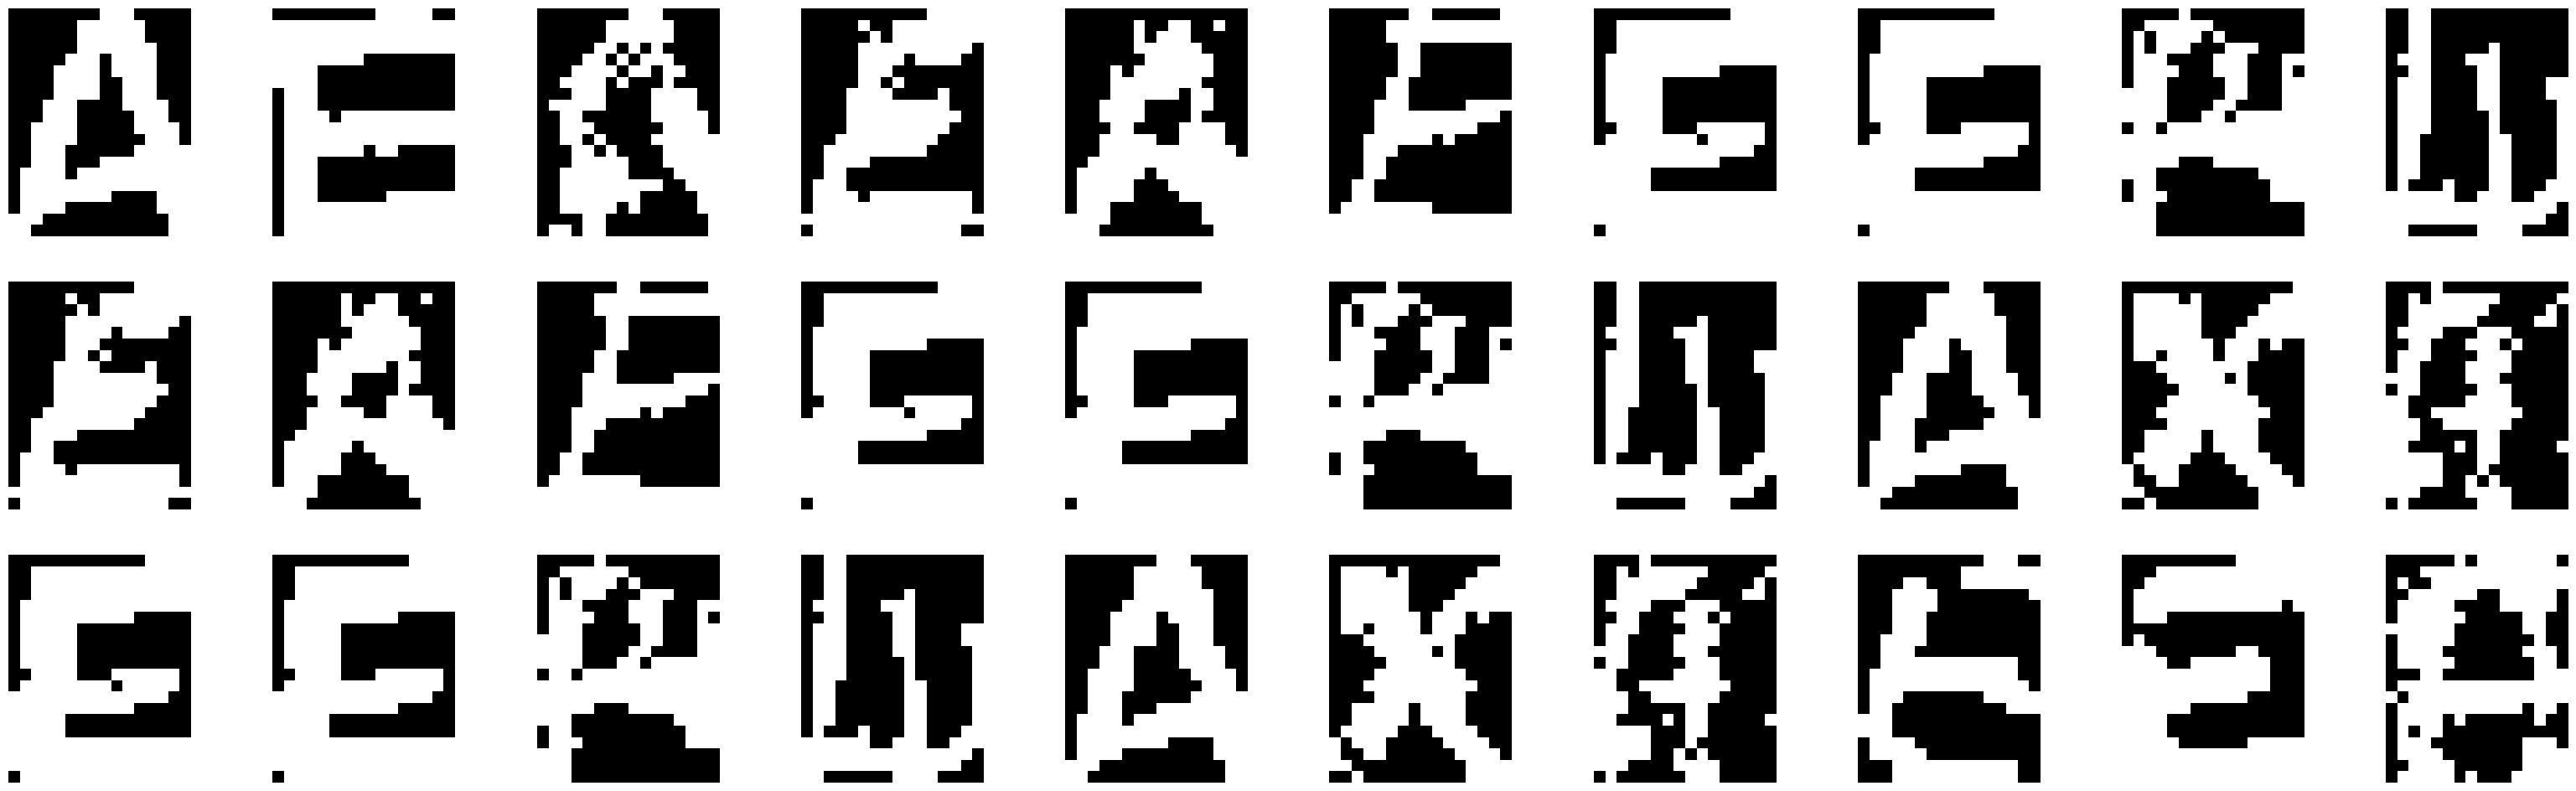

In [7]:
alpha_gen = dbn_alpha.generer_image_DBN(num_samples=30, gibbs_steps=5000, image_size=(20, 16))

# MNIST

In [ ]:
dnn_random = DNN(X_train, y_train, num_classes=10, num_hidden_layers=nb_layers, neurons=neurons,
                X_val=X_test, y_val=y_test)
dnn_pretrained = DNN(X_train, y_train, num_classes=10, num_hidden_layers=nb_layers, neurons=neurons,
                X_val=X_test, y_val=y_test)

In [5]:
dnn_pretrained.pretrain_DNN(epochs=epochs, learning_rate=learning_rate, batch_size=batch_size)

  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [05:53<00:00, 176.77s/it]


In [ ]:
losses_random, accuracies_random, val_losses_random, val_accuracies_random = dnn_random.retropropagation(
    epochs=epochs, learning_rate=learning_rate, batch_size=batch_size, plot_=True, patience=patience, 
    suptitle='Random initialization')

In [ ]:
losses_pretrained, accuracies_pretrained, val_losses_pretrained, val_accuracies_pretrained = dnn_pretrained.retropropagation(
    epochs=epochs, learning_rate=learning_rate, batch_size=batch_size, plot_=True, patience=patience, 
    suptitle='Pre-trained with DBN')